In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ObesityDataSet.csv")

In [4]:
# Map binary string features to numeric
binary_map = {'yes': 1, 'no': 0}
binary_features = ['FAVC','SMOKE','SCC','family_history_with_overweight']
for col in binary_features:
    df[col] = df[col].map(binary_map)

In [5]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

In [7]:
# -------------------------
# Train/Test split (80/20)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [8]:
# -------------------------
# Define feature types
# -------------------------
# Feature lists
numeric_features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
categorical_features = ['Gender','CAEC','CALC','MTRANS']


In [9]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # binary features remain as-is
)

In [10]:
# -------------------------
# 2. Create pipeline with Logistic Regression
# -------------------------
logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [11]:
# -------------------------
# 3. Train model
# -------------------------
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_pre, y_train)

/home/cloud/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [12]:
# -------------------------
# 4. Predict
# -------------------------
y_pred = logreg.predict(X_test_pre)
y_prob = logreg.predict_proba(X_test_pre)

In [13]:
# -------------------------
# 5. Evaluation Metrics
# -------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
auc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr', average='weighted')

print("=== Logistic Regression Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC Score: {mcc:.4f}")


=== Logistic Regression Evaluation Metrics ===
Accuracy: 0.8794
AUC Score: 0.9846
Precision: 0.8779
Recall: 0.8794
F1 Score: 0.8781
MCC Score: 0.8593


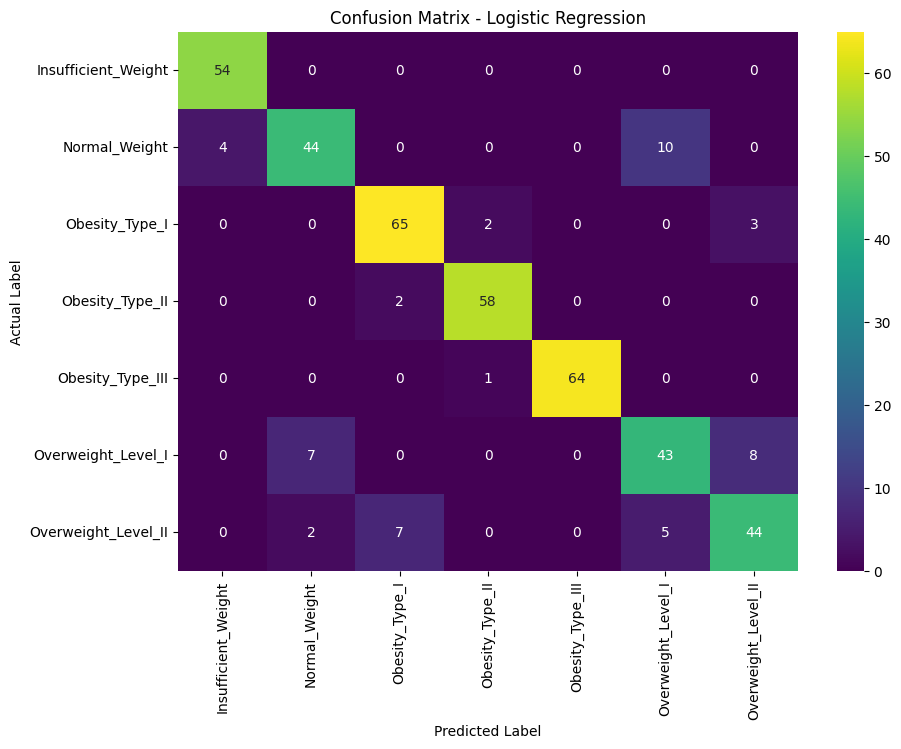

In [14]:
# -------------------------
# 6. Optional: Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [15]:
os.makedirs('model', exist_ok=True)

# Save preprocessor
joblib.dump(preprocessor, 'model/logreg_preprocessor.pkl')

# Save trained Logistic Regression model
joblib.dump(logreg, 'model/logistic_regression_model.pkl')

print("✅ Logistic Regression model and preprocessor saved successfully!")

✅ Logistic Regression model and preprocessor saved successfully!
